In [1]:
import sike
import numpy as np

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Carbon
 100.0%
Conservation check: 1.42e-14


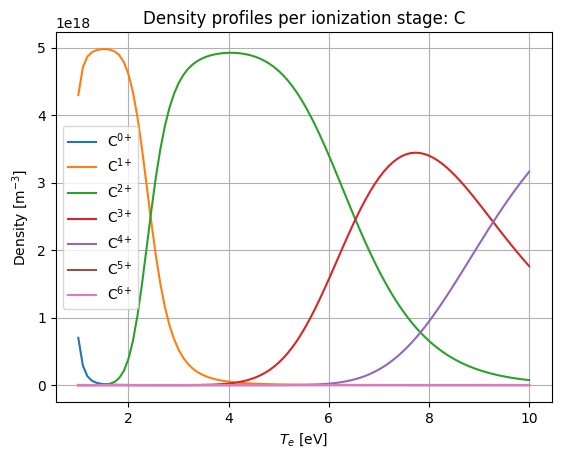

<Axes: title={'center': 'Density profiles per ionization stage: C'}, xlabel='$T_e$ [eV]', ylabel='Density [m$^{-3}$]'>

In [2]:
# 1. Initialise with electron temperature and density profiles
nx = 100
Te = np.linspace(1,10,nx)
ne = 1e20 * np.ones(nx)

c = sike.SIKERun(Te=Te, ne=ne, element="C")
ds = c.solve()

sike.plotting.plot_nz(ds)

Using default velocity grid.
Using default velocity grid.
Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Carbon
 100.0%
Conservation check: 0.00e+00


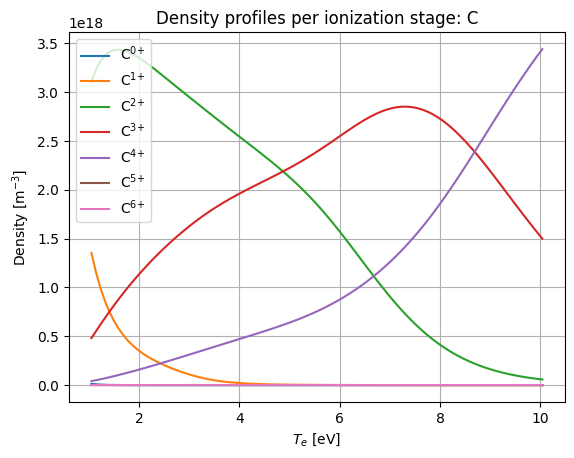

<Axes: title={'center': 'Density profiles per ionization stage: C'}, xlabel='$T_e$ [eV]', ylabel='Density [m$^{-3}$]'>

In [3]:
# 2. Initialise with electron distributions
nx = 100
Te = np.linspace(1,10,nx)
ne = 1e20 * np.ones(nx)

hot_frac = 0.001
fe = sike.get_bimaxwellians(n1=hot_frac*ne,
                            n2=(1-hot_frac)*ne,
                            T1 = 50*np.ones(nx),
                            T2 = Te)

c = sike.SIKERun(fe, element="C")
ds = c.solve()

sike.plotting.plot_nz(ds)

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Lithium
 100.0%
Evolving evolution equations...

Conservation check on rank 0: -1.72e-02
Done.


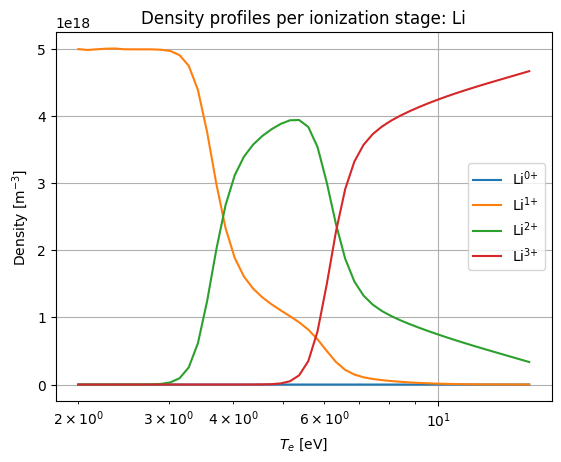

<Axes: title={'center': 'Density profiles per ionization stage: Li'}, xlabel='$T_e$ [eV]', ylabel='Density [m$^{-3}$]'>

In [4]:
# 3. Atomic data resolved in j
nx = 50
Te = np.geomspace(2.0,15.0,nx)
ne = 1e20 * np.ones(nx)

c = sike.SIKERun(Te=Te, ne=ne, element="Li", resolve_j = True, resolve_l = True)
ds = c.evolve(dt=1e-2)

sike.plotting.plot_nz(ds, logx=True)

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling transition matrix for Argon
 100.0%
Conservation check: 0.00e+00


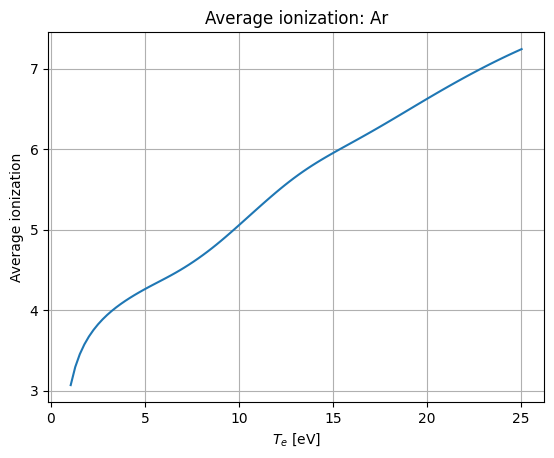

<Axes: title={'center': 'Average ionization: Ar'}, xlabel='$T_e$ [eV]', ylabel='Average ionization'>

In [5]:
# 4. Use a custom velocity grid
E_min_ev = 1e-4
E_max_ev = 1e4
v_min = np.sqrt(2.0 * E_min_ev * sike.EL_CHARGE / sike.EL_MASS)
v_max = np.sqrt(2.0 * E_max_ev * sike.EL_CHARGE / sike.EL_MASS)
nv = 200
vgrid = np.geomspace(v_min, v_max, nv)

nx = 100
Te = np.linspace(1,25,nx)
ne = 1e20 * np.ones(nx)

hot_frac = 0.001
fe = sike.get_bimaxwellians(n1=hot_frac*ne,
                            n2=(1-hot_frac)*ne,
                            T1 = 50*np.ones(nx),
                            T2 = Te,
                            vgrid = vgrid)

c = sike.SIKERun(fe=fe, vgrid=vgrid, element="Ar")
ds = c.solve()

sike.plotting.plot_Zavg(ds)